In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df =pd.read_csv('/content/export-TagoIo.csv')
df=df.drop(['time'], axis=1)
df["value:feel"]=df["value:feel"].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], ["Feliz","Sede","Enjoada","Calor","Frio","Vampira","Com óculos"])
df.fillna(value=df.mean(), inplace=True)
df.head()

<ipython-input-2-e38db527f16b>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(value=df.mean(), inplace=True)


,value:humi,value:temp,value:lumi,value:feel
0,31.186094,33.029999,5.000000,Sede
1,30.981594,33.020000,1422.000000,Sede
2,30.879345,32.990002,730.000000,Sede
3,31.083843,32.990002,608.903784,Sede
4,31.083843,32.930000,1115.000000,Sede


Index(['value:humi', 'value:temp', 'value:lumi'], dtype='object')


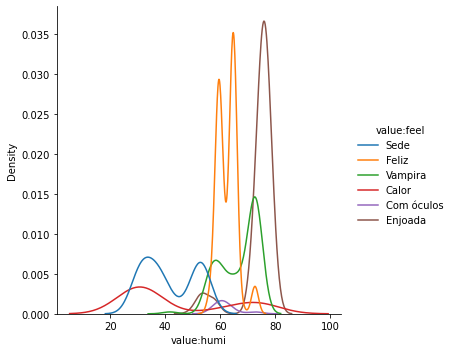

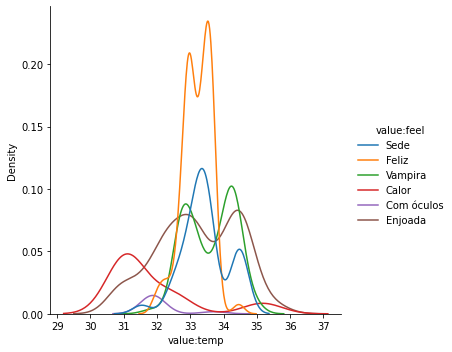

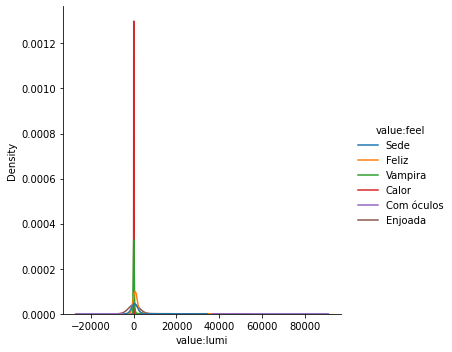

In [3]:
features=df.columns[0:-1]
print(features)
for i in range(0,len(features)):
  sns.displot(data=df, x=features[i], hue="value:feel", kind="kde")

**Observando as densidades de probabilidade considerando a felicidade da planta como classe divisória tem-se as seguintes observações:**

* Para a distribuição de umidade observa-se que valores entre 50 e 70 a planta tende a estar  feliz, já valores entre 65 e 85 tem-se a tendência que a mesma esteja enjoada.

* Para a distribuição de temperatura valores entre 32 e 34 tem-se que a planta esteve, na maior parte das observações, feliz. Nessa mesma, faixa, a planta também esteve com sede, entretando, isso foi observado em uma quantidade menor de vezes. 

* Valores de temperatura entre 34 e 36 a tornarão vampira.

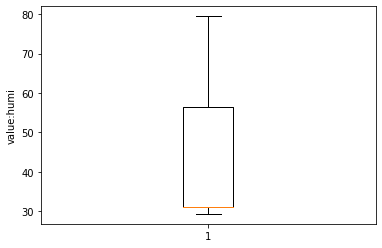

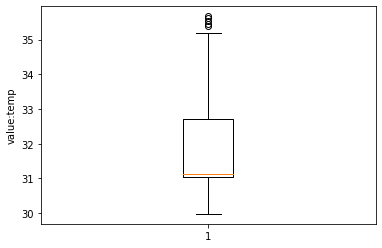

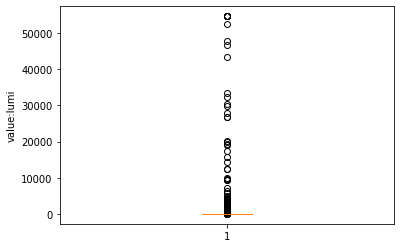

In [4]:
for i in range(0,3):
  plt.figure()
  plt.boxplot(data=df, x=features[i])
  plt.ylabel(features[i])

**Diante dos medidos observou-se que: a temperatura e a humidade apresentaram uma maior quantidade de valores supereriores à média.**

* Observando a variância do dados, tem-se que a temperatura tem valores, em sua maioria, próximos à média. Comportamnto similiar pode ser visto na umidade mesmo que com uma maior variabilidade. 

* Já a luminnosidade apresentou uma grande variação em relação à média.

In [5]:
df.std()

<ipython-input-5-ce97bb7eaef8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


value:humi      16.584915
value:temp       1.190974
value:lumi    4147.821684
dtype: float64

In [6]:
df =pd.read_csv('/content/export-TagoIo.csv')
df=df.drop(['time'], axis=1)
features = df.columns[0:-1].tolist()
print("have", len(features),":",features) 

have 3 : ['value:humi', 'value:temp', 'value:lumi']


In [7]:
df=df.fillna(method='ffill')

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

 
X = df.iloc[:,0:len(features)]   
y = df.iloc[:,-1]     

 
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score')) 

        Specs         Score
2  value:lumi  1.709757e+07
0  value:humi  1.116623e+04
1  value:temp  6.635310e+01


In [9]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
2,value:lumi,1.709757e+07
0,value:humi,1.116623e+04
1,value:temp,6.635310e+01


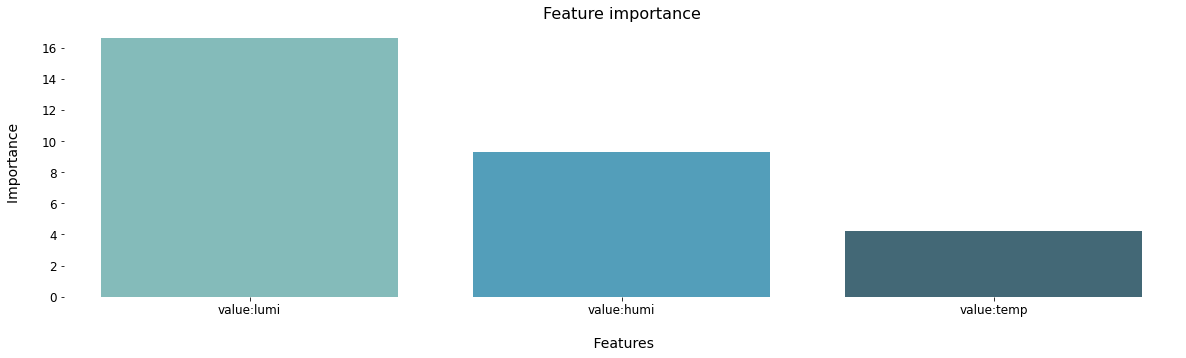

In [10]:
plt.figure(figsize=(20,5))
sns.barplot(x=featureScores['Specs'], y=np.log(featureScores['Score']), palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Aplicando o Teste qui-quadrado de Pearson tem-se que a luminosidade é o fator mais importante para classificação do estado da planta seguido da umidade.**